# Experiment 10: Train, validate, test (split data into 70%, 15%, 15% respectively)

In [175]:
# script to split data into train, validate and test

import os
import random
import shutil

def split_data(dataset_path, train_ratio=0.7, validate_ratio=0.15, test_ratio=0.15):
    assert train_ratio + validate_ratio + test_ratio == 1.0, "Ratios should sum up to 1.0"

    # Create directories for train, validate, and test sets
    train_dir = os.path.join(dataset_path, 'train')
    validate_dir = os.path.join(dataset_path, 'validate')
    test_dir = os.path.join(dataset_path, 'test')

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(validate_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # List all class subdirectories in the dataset folder
    classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    for class_name in classes:
        class_dir = os.path.join(dataset_path, class_name)
        images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
        random.shuffle(images)

        num_images = len(images)
        num_train = int(num_images * train_ratio)
        num_validate = int(num_images * validate_ratio)

        train_images = images[:num_train]
        validate_images = images[num_train:num_train + num_validate]
        test_images = images[num_train + num_validate:]

        # Move images to respective directories
        for img in train_images:
            src_path = os.path.join(class_dir, img)
            dst_path = os.path.join(train_dir, class_name, img)
            os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
            shutil.copy(src_path, dst_path)

        for img in validate_images:
            src_path = os.path.join(class_dir, img)
            dst_path = os.path.join(validate_dir, class_name, img)
            os.makedirs(os.path.join(validate_dir, class_name), exist_ok=True)
            shutil.copy(src_path, dst_path)

        for img in test_images:
            src_path = os.path.join(class_dir, img)
            dst_path = os.path.join(test_dir, class_name, img)
            os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
            shutil.copy(src_path, dst_path)

    # Count and print the number of images in each folder and their percentages
    total_images = sum(len(files) for _, _, files in os.walk(dataset_path))

    for folder_name in ['train', 'validate', 'test']:
        folder_path = os.path.join(dataset_path, folder_name)
        folder_images = sum(len(files) for _, _, files in os.walk(folder_path))
        percentage = (folder_images / total_images) * 100
        print(f"{folder_name.capitalize()} Set: {folder_images} images")

# Replace 'dataset_path' with your actual dataset path
dataset_path = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\split data 70-15-15'
split_data(dataset_path, train_ratio=0.7, validate_ratio=0.15, test_ratio=0.15)


Train Set: 1232 images
Validate Set: 264 images
Test Set: 264 images


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 26, 26, 128)    

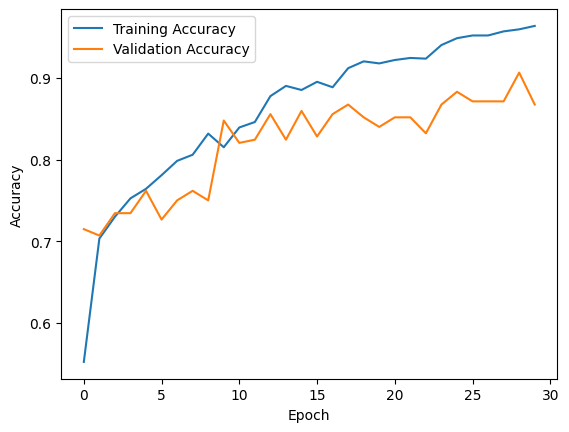

9/9 [==============================] - 1s 97ms/step


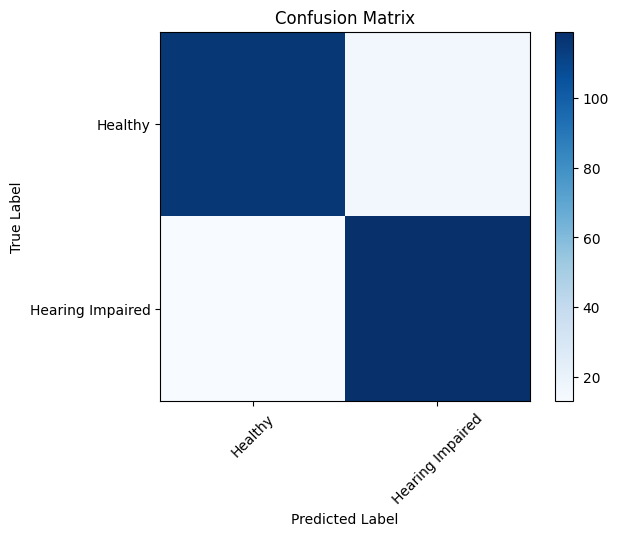

[[116  16]
 [ 13 119]]
Classification Report:
                  precision    recall  f1-score   support

         Healthy       0.90      0.88      0.89       132
Hearing Impaired       0.88      0.90      0.89       132

        accuracy                           0.89       264
       macro avg       0.89      0.89      0.89       264
    weighted avg       0.89      0.89      0.89       264



In [176]:
import os
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Path to the data directories
train_data_dir = 'C:/Users/student/Documents/snhl-ERP/machine learning/split data 70-15-15/train'
val_data_dir = 'C:/Users/student/Documents/snhl-ERP/machine learning/split data 70-15-15/validate'
test_data_dir = 'C:/Users/student/Documents/snhl-ERP/machine learning/split data 70-15-15/test'


# CNN Model
def build_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Dimensions of the images (224x224 with 3 channels)
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)

# Create the CNN model
model = build_model(input_shape)
model.summary()

# Data generators for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the confusion matrix
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)
cm = confusion_matrix(y_true, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(cm)

# Classification Report
class_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# Experiment 9: Train, validate, test (split data into 80%, 10%, 10% respectively)

In [169]:
# script to split data into train, validate and test

import os
import random
import shutil

def split_data(dataset_path, train_ratio=0.8, validate_ratio=0.1, test_ratio=0.1):
    assert train_ratio + validate_ratio + test_ratio == 1.0, "Ratios should sum up to 1.0"

    # Create directories for train, validate, and test sets
    train_dir = os.path.join(dataset_path, 'train')
    validate_dir = os.path.join(dataset_path, 'validate')
    test_dir = os.path.join(dataset_path, 'test')

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(validate_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # List all class subdirectories in the dataset folder
    classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    for class_name in classes:
        class_dir = os.path.join(dataset_path, class_name)
        images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
        random.shuffle(images)

        num_images = len(images)
        num_train = int(num_images * train_ratio)
        num_validate = int(num_images * validate_ratio)

        train_images = images[:num_train]
        validate_images = images[num_train:num_train + num_validate]
        test_images = images[num_train + num_validate:]

        # Move images to respective directories
        for img in train_images:
            src_path = os.path.join(class_dir, img)
            dst_path = os.path.join(train_dir, class_name, img)
            os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
            shutil.copy(src_path, dst_path)

        for img in validate_images:
            src_path = os.path.join(class_dir, img)
            dst_path = os.path.join(validate_dir, class_name, img)
            os.makedirs(os.path.join(validate_dir, class_name), exist_ok=True)
            shutil.copy(src_path, dst_path)

        for img in test_images:
            src_path = os.path.join(class_dir, img)
            dst_path = os.path.join(test_dir, class_name, img)
            os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
            shutil.copy(src_path, dst_path)

    # Count and print the number of images in each folder and their percentages
    total_images = sum(len(files) for _, _, files in os.walk(dataset_path))

    for folder_name in ['train', 'validate', 'test']:
        folder_path = os.path.join(dataset_path, folder_name)
        folder_images = sum(len(files) for _, _, files in os.walk(folder_path))
        percentage = (folder_images / total_images) * 100
        print(f"{folder_name.capitalize()} Set: {folder_images} images")

# Replace 'dataset_path' with your actual dataset path
dataset_path = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\split data 80-10-10'
split_data(dataset_path, train_ratio=0.8, validate_ratio=0.1, test_ratio=0.1)


Train Set: 1408 images
Validate Set: 176 images
Test Set: 176 images


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 26, 26, 128)    

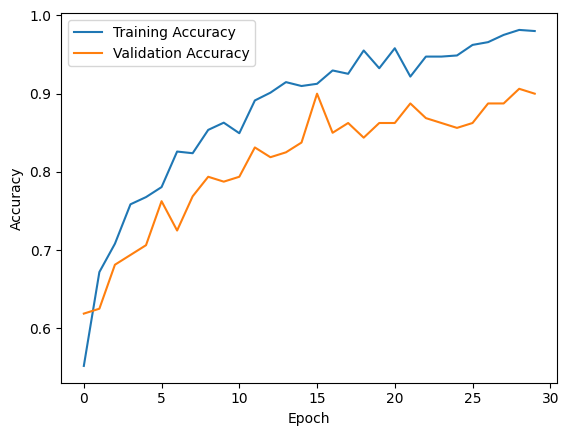

6/6 [==============================] - 1s 77ms/step


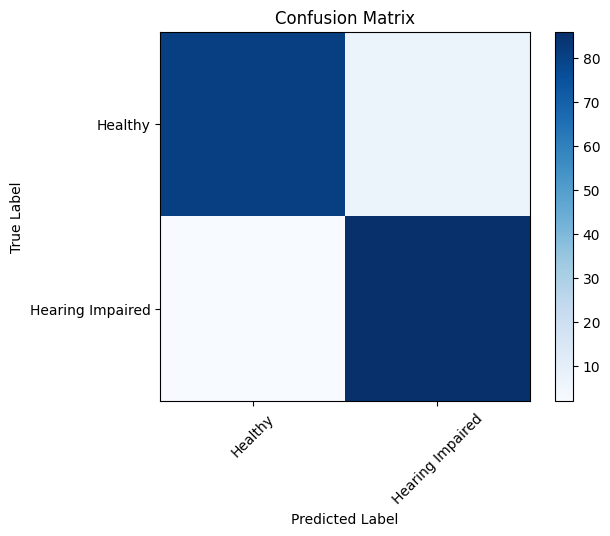

Classification Report:
                  precision    recall  f1-score   support

         Healthy       0.98      0.92      0.95        88
Hearing Impaired       0.92      0.98      0.95        88

        accuracy                           0.95       176
       macro avg       0.95      0.95      0.95       176
    weighted avg       0.95      0.95      0.95       176



In [170]:
import os
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Path to the data directories
train_data_dir = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\split data 80-10-10\\train'
val_data_dir = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\split data 80-10-10\\validate'
test_data_dir = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\split data 80-10-10\\test'

# CNN Model
def build_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Dimensions of the images (224x224 with 3 channels)
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)

# Create the CNN model
model = build_model(input_shape)
model.summary()

# Data generators for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the confusion matrix
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)
cm = confusion_matrix(y_true, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print(cm)

# Classification Report
class_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# Experiment 8: mix of testing, training and validation in pairs

In [ ]:
# script to train and test folders 

In [153]:
# script to split dataset into training and testing data

import os
import random
import shutil

def create_train_test_folders(dataset_path, train_ratio=0.7):
    assert train_ratio < 1.0, "Train ratio should be less than 1.0"

    # Create directories if they don't exist
    train_dir = os.path.join(dataset_path, 'train')
    test_dir = os.path.join(dataset_path, 'test')

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # List all class subdirectories in the dataset folder
    classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    class_sizes = {}

    for class_name in classes:
        # Ignore 'train' and 'test' directories
        if class_name not in ['train', 'test']:
            class_dir = os.path.join(dataset_path, class_name)
            images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
            random.shuffle(images)

            num_images = len(images)
            num_train = int(num_images * train_ratio)

            train_images = images[:num_train]
            test_images = images[num_train:]

            # Move images to respective directories
            for img in train_images:
                src_path = os.path.join(class_dir, img)
                dst_path = os.path.join(train_dir, class_name, img)
                os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
                shutil.copy(src_path, dst_path)

            for img in test_images:
                src_path = os.path.join(class_dir, img)
                dst_path = os.path.join(test_dir, class_name, img)
                os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
                shutil.copy(src_path, dst_path)

            class_sizes[class_name] = {
                'train': len(train_images),
                'test': len(test_images)
            }

    return class_sizes

# Replace 'dataset_path' with the actual path to your main dataset folder
dataset_path = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\10ms interval dataset'
sizes = create_train_test_folders(dataset_path)

# Print the sizes of each folder and its subfolders
for class_name, size_dict in sizes.items():
    print(f"Class: {class_name}")
    print(f"Train: {size_dict['train']} images")
    print(f"Test: {size_dict['test']} images")
    print()


Class: Healthy
Train: 616 images
Test: 264 images

Class: Hearing Impaired
Train: 616 images
Test: 264 images



In [155]:
import os

def count_images_in_subfolders(folder_path):
    subfolders = [f.name for f in os.scandir(folder_path) if f.is_dir()]
    print(f"Folder: {folder_path}")
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder_path, subfolder)
        num_images = len(os.listdir(subfolder_path))
        print(f"  Subfolder '{subfolder}': {num_images} images")

# Replace 'dataset_path' with the actual path to the 'test' folder
test_folder_path = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\10ms interval dataset\\test'
count_images_in_subfolders(test_folder_path)

# Replace 'dataset_path' with the actual path to the 'train' folder
train_folder_path = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\10ms interval dataset\\train'
count_images_in_subfolders(train_folder_path)


Folder: C:\Users\student\Documents\snhl-ERP\machine learning\10ms interval dataset\test
  Subfolder 'Healthy': 264 images
  Subfolder 'Hearing Impaired': 264 images
Folder: C:\Users\student\Documents\snhl-ERP\machine learning\10ms interval dataset\train
  Subfolder 'Healthy': 616 images
  Subfolder 'Hearing Impaired': 616 images


In [158]:
# Print the shape of the training and testing datasets
print("Number of training samples:", len(train_generator.filenames))
print("Number of testing samples:", len(test_generator.filenames))

Number of training samples: 1232
Number of testing samples: 528


In [165]:
#CNN MODEL on testing and training dataset

import os
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Replace 'train_data_dir' and 'test_data_dir' with your actual dataset paths
train_data_dir = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\10ms interval dataset\\train'
test_data_dir = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\10ms interval dataset\\test'

# CNN Model
def build_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Dimensions of the images (224x224 with 3 channels)
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)

# Create the CNN model
model = build_model(input_shape)
model.summary()

# Data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 26, 26, 128)    

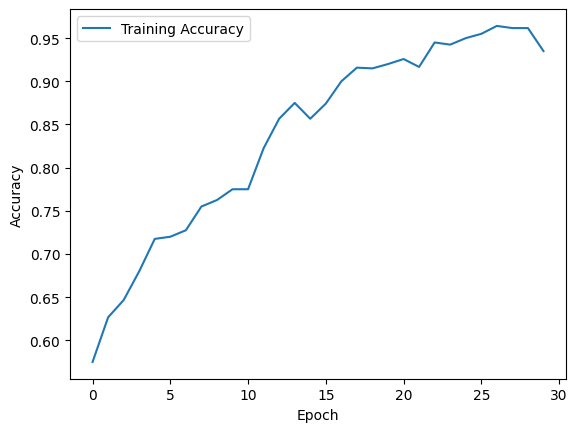

17/17 [==============================] - 2s 92ms/step


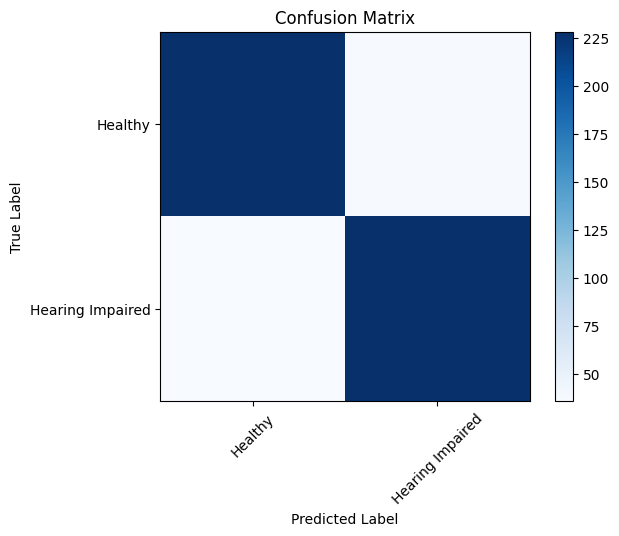

Classification Report:
                  precision    recall  f1-score   support

         Healthy       0.86      0.86      0.86       264
Hearing Impaired       0.86      0.86      0.86       264

        accuracy                           0.86       528
       macro avg       0.86      0.86      0.86       528
    weighted avg       0.86      0.86      0.86       528

Confusion Matrix:
[[227  37]
 [ 36 228]]


In [166]:
#Model Analysis

# Plotting the training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the confusion matrix
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)
cm = confusion_matrix(y_true, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

from sklearn.metrics import confusion_matrix

# Assuming you have already defined 'y_true' and 'y_pred'
cm = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)



In [159]:
# Make a prediction on a single test data
from tensorflow.keras.preprocessing import image
import numpy as np

# Replace 'test_image_path' with the path to your test image
test_image_path = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\10ms interval dataset\\test\\healthy\\topographic_map_millisecond_2.200000e+02ms_sub-023.png'

# Load the test image
test_img = image.load_img(test_image_path, target_size=(img_width, img_height))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)  # Reshape the image to (1, img_width, img_height, 3)
test_img = test_img / 255.0  # Rescale the image

# Make the prediction
prediction = model.predict(test_img)

# Get the class with the highest probability
predicted_class = np.argmax(prediction, axis=-1)

# Get the class labels
class_labels = list(train_generator.class_indices.keys())

# Print the result
print("Predicted class:", class_labels[predicted_class[0]])


1/1 [==============================] - 0s 349ms/step
Predicted class: Healthy


In [140]:
# script to creating training, testing and validation folders

import os
import random
import shutil

def create_train_test_val_folders(dataset_path, train_ratio=0.7, val_ratio=0.15):
    assert train_ratio + val_ratio < 1.0, "Train and validation ratio sum should be less than 1.0"

    # Create directories if they don't exist
    train_dir = os.path.join(dataset_path, 'train')
    test_dir = os.path.join(dataset_path, 'test')
    val_dir = os.path.join(dataset_path, 'validation')

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    # List all class subdirectories in the dataset folder
    classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

    class_sizes = {}

    for class_name in classes:
        # Ignore 'train', 'test', and 'validation' directories
        if class_name not in ['train', 'test', 'validation']:
            class_dir = os.path.join(dataset_path, class_name)
            images = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]
            random.shuffle(images)

            num_images = len(images)
            num_train = int(num_images * train_ratio)
            num_val = int(num_images * val_ratio)

            train_images = images[:num_train]
            val_images = images[num_train:num_train + num_val]
            test_images = images[num_train + num_val:]

            # Move images to respective directories
            for img in train_images:
                src_path = os.path.join(class_dir, img)
                dst_path = os.path.join(train_dir, class_name, img)
                os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
                shutil.copy(src_path, dst_path)

            for img in val_images:
                src_path = os.path.join(class_dir, img)
                dst_path = os.path.join(val_dir, class_name, img)
                os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)
                shutil.copy(src_path, dst_path)

            for img in test_images:
                src_path = os.path.join(class_dir, img)
                dst_path = os.path.join(test_dir, class_name, img)
                os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)
                shutil.copy(src_path, dst_path)

            class_sizes[class_name] = {
                'train': len(train_images),
                'validation': len(val_images),
                'test': len(test_images)
            }

    return class_sizes

# Replace 'dataset_path' with your actual dataset path
dataset_path = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\10ms interval dataset'
sizes = create_train_test_val_folders(dataset_path)

# Print the sizes of each folder and its subfolders
for class_name, size_dict in sizes.items():
    print(f"Class: {class_name}")
    print(f"Train: {size_dict['train']} images")
    print(f"Validation: {size_dict['validation']} images")
    print(f"Test: {size_dict['test']} images")

    # Print subfolder sizes
    for subfolder_name in ['train', 'validation', 'test']:
        subfolder_path = os.path.join(dataset_path, subfolder_name, class_name)
        num_subfolder_images = len(os.listdir(subfolder_path))
        print(f"  {subfolder_name.capitalize()} subfolder: {num_subfolder_images} images")

    print()


Class: Healthy
Train: 616 images
Validation: 132 images
Test: 132 images
  Train subfolder: 616 images
  Validation subfolder: 132 images
  Test subfolder: 132 images

Class: Hearing Impaired
Train: 616 images
Validation: 132 images
Test: 132 images
  Train subfolder: 616 images
  Validation subfolder: 132 images
  Test subfolder: 132 images



In [146]:
# code to train, validate and test:
# not enough GPU space

import os
import random
import shutil
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Replace 'dataset_path' with your actual dataset path
dataset_path = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\10ms interval dataset'

# dataset_path = 'C:/Users/student/Documents/snhl-ERP/machine learning/all datasets/N1'
sizes = create_train_test_val_folders(dataset_path)

# CNN Model
def build_model(input_shape):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Dimensions of the images (224x224 with 3 channels)
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)

# Create the CNN model
model = build_model(input_shape)
model.summary()

# Data generators for training, validation, and testing
train_data_dir = os.path.join(dataset_path, 'train')
val_data_dir = os.path.join(dataset_path, 'validation')
test_data_dir = os.path.join(dataset_path, 'test')

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Plotting the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting the confusion matrix
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=-1)
cm = confusion_matrix(y_true, y_pred)

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(test_generator.class_indices))
plt.xticks(tick_marks, test_generator.class_indices.keys(), rotation=45)
plt.yticks(tick_marks, test_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
class_names = list(test_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[86528,512] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2]

# Experiment 7: apply cross validation to machine learning model (K-Fold Cross validation) (dosn't work)

Found 1408 images belonging to 2 classes.
Shape of sample_labels: (32,)


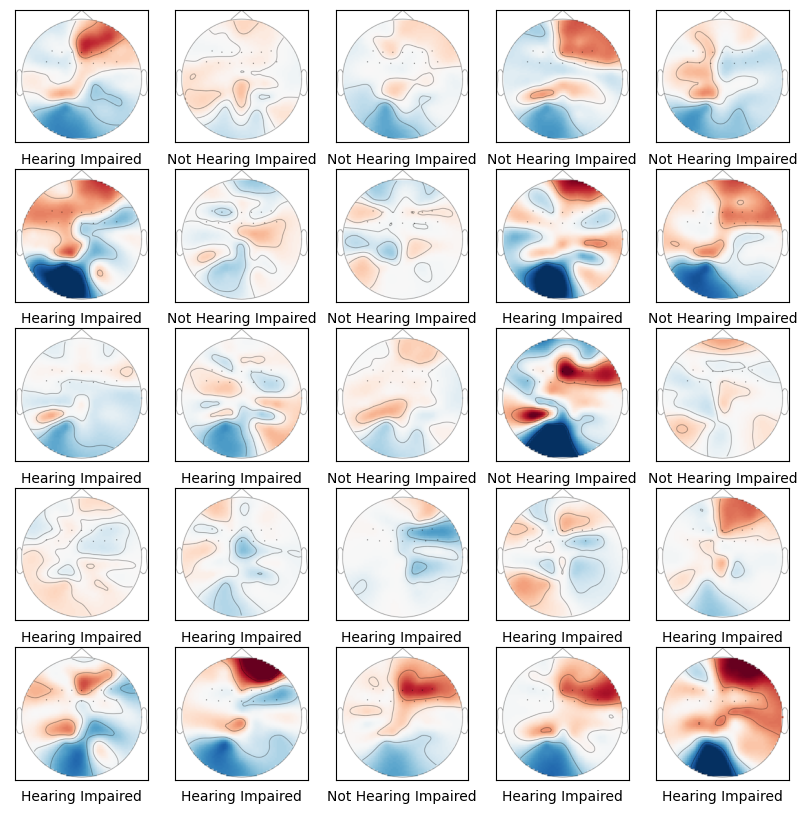

Found 352 images belonging to 2 classes.
Shape of val_sample_labels: (32,)


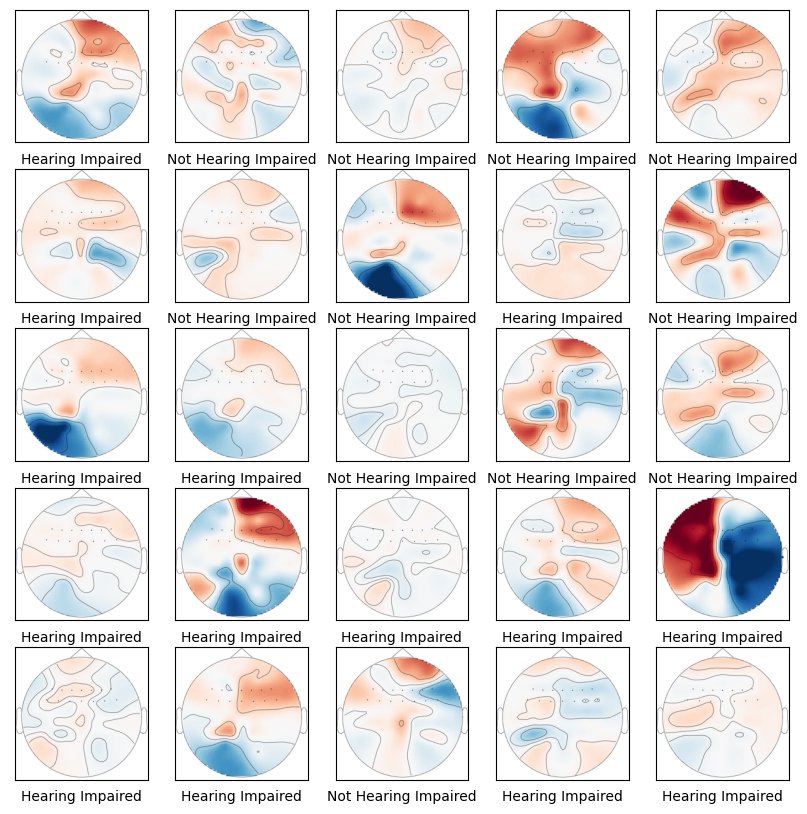

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

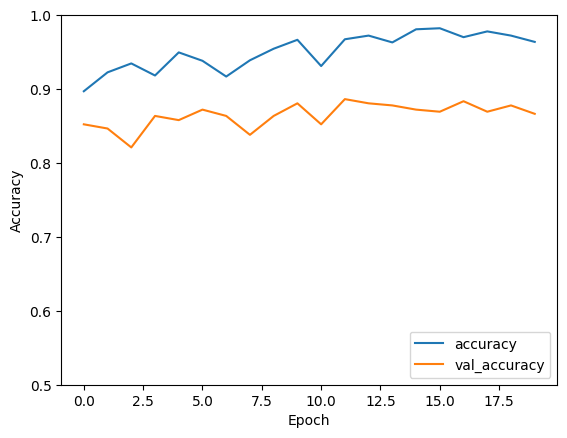

11/11 [==============================] - 1s 91ms/step - loss: 0.7461 - accuracy: 0.8665
Test Accuracy: 0.8664772510528564


In [148]:
# dataset: got each patient's scalp map at every 10th millisecond from 0ms - 400ms on their ERP waveform. 
# This gave us 40 images per patient which is a total of 1,760 images

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Download and prepare dataset


# Define relevant variables for the ML task
batch_size = 32
num_classes = 2

# Define the path to your dataset
data_dir = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\10ms interval dataset'

# Define the transformations
all_transforms = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to be between 0 and 1
    validation_split=0.2  # Splitting the dataset into training and validation sets
)

# Load the full dataset using flow_from_directory
train_dataset = all_transforms.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Adjust target size as needed
    batch_size=batch_size,
    class_mode='binary',  # Assuming a binary classification task (2 classes)
    classes=['Healthy', 'Hearing Impaired'],  # Switched class labels
    subset='training'  # Use subset='validation' for the validation dataset
)


# Get a sample batch of images and labels
sample_images, sample_labels = next(iter(train_dataset))
# Print the shape of sample_labels
print("Shape of sample_labels:", sample_labels.shape)

# Define class names
class_names = ['Hearing Impaired', 'Not Hearing Impaired']
# Visualize a sample of 25 images with labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_images[i])
    plt.xlabel(class_names[int(sample_labels[i])])
plt.show()


val_dataset = all_transforms.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Adjust target size as needed
    batch_size=batch_size,
    class_mode='binary',  # Assuming a binary classification task (2 classes)
    classes=['Healthy', 'Hearing Impaired'],  # Switched class labels
    subset='validation'  # Use subset='training' for the training dataset
)

# Get a sample batch of images and labels from the validation dataset
val_sample_images, val_sample_labels = next(iter(val_dataset))
# Print the shape of val_sample_labels
print("Shape of val_sample_labels:", val_sample_labels.shape)

# Define class names
class_names = ['Hearing Impaired', 'Not Hearing Impaired']

# Visualize a sample of 25 images with labels from the validation dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(val_sample_images[i])
    plt.xlabel(class_names[int(sample_labels[i])])
plt.show()

# create the convolutional base
# The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

# As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these
#  dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the 
#  format of CIFAR images. You can do this by passing the argument input_shape to your first layer.

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Let's display the architecture of your model so far:


model.summary()

# Add Dense layers on top
# To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform
#  classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 
# 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification
# Here's the complete architecture of your model:

model.summary()

# epoch: 10
# Compile the model using BinaryCrossentropy loss
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),  # Use from_logits=False
              metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

# epoch: 20
# Compile the model using BinaryCrossentropy loss
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),  # Use from_logits=False
              metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20
)
# Create plots for training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
# Evaluate the model on the test dataset (val_dataset in this case)
test_loss, test_acc = model.evaluate(val_dataset)
print(f"Test Accuracy: {test_acc}")

In [127]:
import os
import cv2
import numpy as np

# Define the path to your dataset directory
data_dir = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\10ms interval dataset'

# Function to read and preprocess the images
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Resize the image to (224, 224)
    image = image / 255.0  # Scale pixel values to be between 0 and 1
    return image

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through the dataset directory to load images and collect labels
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        class_label = 0 if class_name == 'Healthy' else 1
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            images.append(preprocess_image(image_path))
            labels.append(class_label)

# Convert the lists to numpy arrays
data_array = np.array(images)
labels_array = np.array(labels)

# Print the total number of images
num_images = len(data_array)
print("Total number of images:", num_images)

# Print the shape of the data and labels arrays
print("Shape of data array:", data_array.shape)
print("Shape of labels array:", labels_array.shape)


Total number of images: 1760
Shape of data array: (1760, 224, 224, 3)
Shape of labels array: (1760,)


In [136]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold

# Function to read and preprocess the images
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (224, 224))  # Resize the image to (224, 224)
    image = image / 255.0  # Scale pixel values to be between 0 and 1
    return image

# Define the path to your dataset directory
data_dir = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\10ms interval dataset'

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through the dataset directory to load images and collect labels
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        class_label = 0 if class_name == 'Healthy' else 1
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            images.append(preprocess_image(image_path))
            labels.append(class_label)

# Convert the lists to numpy arrays
data_array = np.array(images)
labels_array = np.array(labels)

# Define the number of folds
num_folds = 5

# Define the loss function and optimizer
loss_function = BinaryCrossentropy(from_logits=False)
optimizer = Adam()

# Initialize K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# Initialize lists to store evaluation results for each fold
acc_per_fold = []
loss_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train_index, test_index in kfold.split(data_array, labels_array):
    print(f"Fold: {fold_no}")
    
    # Get the training and test data for this fold
    train_data_fold, test_data_fold = data_array[train_index], data_array[test_index]
    train_labels_fold, test_labels_fold = labels_array[train_index], labels_array[test_index]

    # Create the convolutional base
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))

    # Add Dense layers on top
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss_function,
                  metrics=['accuracy'])

    # Fit data to model
    history = model.fit(train_data_fold, train_labels_fold,
                        batch_size=32,
                        epochs=10,
                        verbose=1)

    # Evaluate the model on the test dataset
    scores = model.evaluate(test_data_fold, test_labels_fold, verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1] * 100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    # Increase fold number
    fold_no += 1

# Print the evaluation results for each fold
for fold, (loss, accuracy) in enumerate(zip(loss_per_fold, acc_per_fold)):
    print(f"Fold {fold + 1} - Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


Fold: 1


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

# Experiment 6: CNN (using tensorflow tutorial) code all in one block

In [ ]:
# dataset: got each patient's scalp map at every 10th millisecond from 0ms - 400ms on their ERP waveform. 
# This gave us 40 images per patient which is a total of 1,760 images

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Download and prepare dataset


# Define relevant variables for the ML task
batch_size = 32
num_classes = 2

# Define the path to your dataset
data_dir = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\10ms interval dataset'

# Define the transformations
all_transforms = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to be between 0 and 1
    validation_split=0.2  # Splitting the dataset into training and validation sets
)

# Load the full dataset using flow_from_directory
train_dataset = all_transforms.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Adjust target size as needed
    batch_size=batch_size,
    class_mode='binary',  # Assuming a binary classification task (2 classes)
    classes=['Healthy', 'Hearing Impaired'],  # Switched class labels
    subset='training'  # Use subset='validation' for the validation dataset
)


# Get a sample batch of images and labels
sample_images, sample_labels = next(iter(train_dataset))
# Print the shape of sample_labels
print("Shape of sample_labels:", sample_labels.shape)

# Define class names
class_names = ['Hearing Impaired', 'Not Hearing Impaired']
# Visualize a sample of 25 images with labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_images[i])
    plt.xlabel(class_names[int(sample_labels[i])])
plt.show()


val_dataset = all_transforms.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Adjust target size as needed
    batch_size=batch_size,
    class_mode='binary',  # Assuming a binary classification task (2 classes)
    classes=['Healthy', 'Hearing Impaired'],  # Switched class labels
    subset='validation'  # Use subset='training' for the training dataset
)

# Get a sample batch of images and labels from the validation dataset
val_sample_images, val_sample_labels = next(iter(val_dataset))
# Print the shape of val_sample_labels
print("Shape of val_sample_labels:", val_sample_labels.shape)

# Define class names
class_names = ['Hearing Impaired', 'Not Hearing Impaired']

# Visualize a sample of 25 images with labels from the validation dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(val_sample_images[i])
    plt.xlabel(class_names[int(sample_labels[i])])
plt.show()

# create the convolutional base
# The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

# As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these
#  dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the 
#  format of CIFAR images. You can do this by passing the argument input_shape to your first layer.

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Let's display the architecture of your model so far:


model.summary()

# Add Dense layers on top
# To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform
#  classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 
# 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification
# Here's the complete architecture of your model:

model.summary()

# epoch: 10
# Compile the model using BinaryCrossentropy loss
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),  # Use from_logits=False
              metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

# epoch: 20
# Compile the model using BinaryCrossentropy loss
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),  # Use from_logits=False
              metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20
)
# Create plots for training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
# Evaluate the model on the test dataset (val_dataset in this case)
test_loss, test_acc = model.evaluate(val_dataset)
print(f"Test Accuracy: {test_acc}")

In [126]:
# Evaludating my trained model's performance: 
# (Previous code remains unchanged)

# Separate the testing data from the validation data
test_dataset = all_transforms.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    classes=['Healthy', 'Hearing Impaired'],
    subset='validation'  # Use subset='validation' for the testing dataset
)

# Compile the model using BinaryCrossentropy loss and desired metrics
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy', 'precision', 'recall', 'f1_score', 'AUC']
)

# Train the model and store the training history (you can remove this if you only want to evaluate on testing data)
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

# Evaluate the model on the testing dataset
test_loss, test_accuracy, test_precision, test_recall, test_f1_score, test_auc = model.evaluate(test_dataset)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1_score}")
print(f"Test AUC: {test_auc}")


Found 352 images belonging to 2 classes.
Epoch 1/10


ValueError: in user code:

    File "c:\Users\student\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\student\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\student\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\student\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 998, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\Users\student\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1092, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\Users\student\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 577, in update_state
        self.build(y_pred, y_true)
    File "c:\Users\student\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 483, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(
    File "c:\Users\student\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 631, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "c:\Users\student\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 631, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "c:\Users\student\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 650, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "c:\Users\student\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\metrics\__init__.py", line 181, in get
        return deserialize(str(identifier))
    File "c:\Users\student\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\metrics\__init__.py", line 136, in deserialize
        return deserialize_keras_object(
    File "c:\Users\student\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\generic_utils.py", line 769, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: precision. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


# Experiment 6: CNN (using tensorflow tutorial)

Found 1408 images belonging to 2 classes.
Shape of sample_labels: (32,)


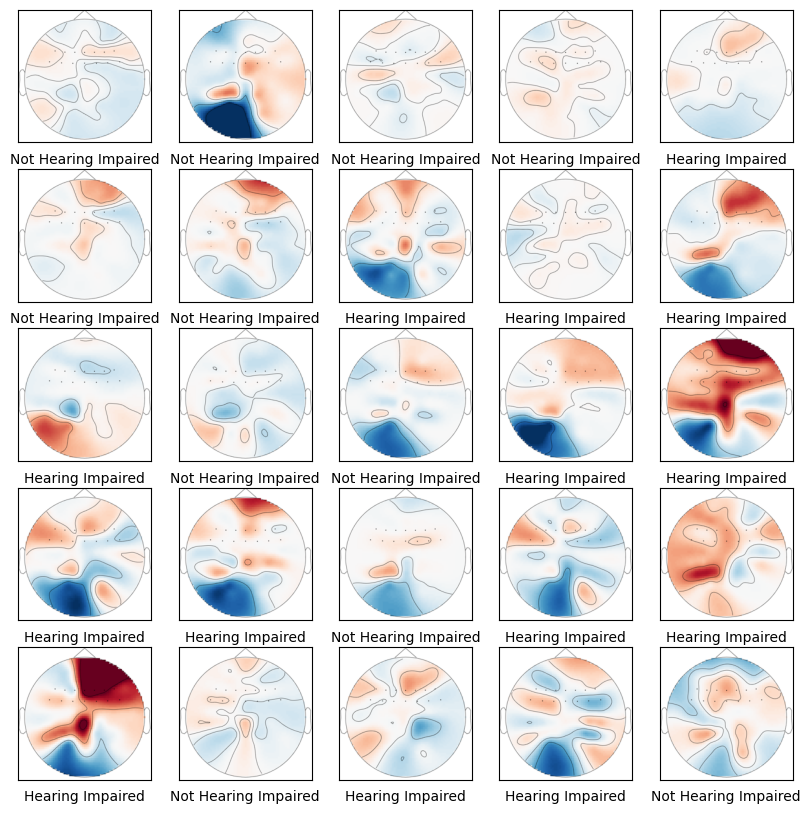

Found 352 images belonging to 2 classes.
Shape of val_sample_labels: (32,)


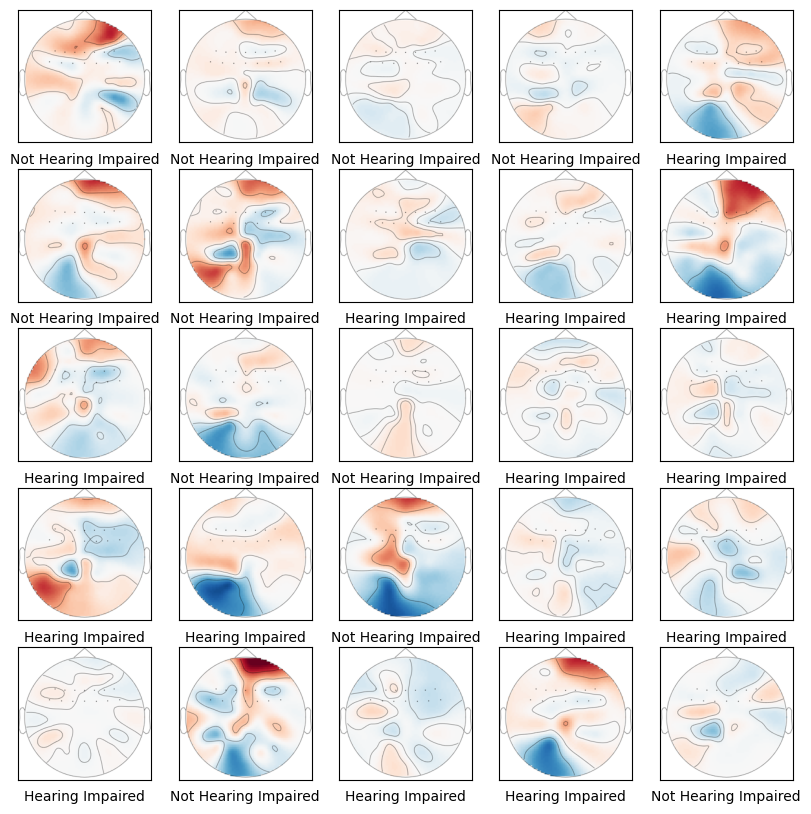

In [94]:
# dataset: got each patient's scalp map at every 10th millisecond from 0ms - 400ms on their ERP waveform. 
# This gave us 40 images per patient which is a total of 1,760 images

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Download and prepare dataset


# Define relevant variables for the ML task
batch_size = 32
num_classes = 2

# Define the path to your dataset
data_dir = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\10ms interval dataset'

# Define the transformations
all_transforms = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to be between 0 and 1
    validation_split=0.2  # Splitting the dataset into training and validation sets
)

# Load the full dataset using flow_from_directory
train_dataset = all_transforms.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Adjust target size as needed
    batch_size=batch_size,
    class_mode='binary',  # Assuming a binary classification task (2 classes)
    classes=['Healthy', 'Hearing Impaired'],  # Switched class labels
    subset='training'  # Use subset='validation' for the validation dataset
)


# Get a sample batch of images and labels
sample_images, sample_labels = next(iter(train_dataset))
# Print the shape of sample_labels
print("Shape of sample_labels:", sample_labels.shape)

# Define class names
class_names = ['Hearing Impaired', 'Not Hearing Impaired']
# Visualize a sample of 25 images with labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample_images[i])
    plt.xlabel(class_names[int(sample_labels[i])])
plt.show()


val_dataset = all_transforms.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Adjust target size as needed
    batch_size=batch_size,
    class_mode='binary',  # Assuming a binary classification task (2 classes)
    classes=['Healthy', 'Hearing Impaired'],  # Switched class labels
    subset='validation'  # Use subset='training' for the training dataset
)

# Get a sample batch of images and labels from the validation dataset
val_sample_images, val_sample_labels = next(iter(val_dataset))
# Print the shape of val_sample_labels
print("Shape of val_sample_labels:", val_sample_labels.shape)

# Define class names
class_names = ['Hearing Impaired', 'Not Hearing Impaired']

# Visualize a sample of 25 images with labels from the validation dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(val_sample_images[i])
    plt.xlabel(class_names[int(sample_labels[i])])
plt.show()

In [86]:
# create the convolutional base
# The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

# As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these
#  dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the 
#  format of CIFAR images. You can do this by passing the argument input_shape to your first layer.

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Let's display the architecture of your model so far:


model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-tra

In [87]:
# Add Dense layers on top
# To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform
#  classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 
# 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification
# Here's the complete architecture of your model:

model.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 flatten_8 (Flatten)         (None, 173056)          

In [89]:
# epoch: 10
# Compile the model using BinaryCrossentropy loss
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),  # Use from_logits=False
              metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)


Epoch 1/10
44/44 [==============================] - 6s 116ms/step - loss: 0.5040 - accuracy: 0.7592 - val_loss: 0.4682 - val_accuracy: 0.7614
Epoch 2/10
44/44 [==============================] - 5s 111ms/step - loss: 0.4087 - accuracy: 0.8075 - val_loss: 0.4221 - val_accuracy: 0.7812
Epoch 3/10
44/44 [==============================] - 5s 107ms/step - loss: 0.3977 - accuracy: 0.8082 - val_loss: 0.4048 - val_accuracy: 0.7983
Epoch 4/10
44/44 [==============================] - 5s 109ms/step - loss: 0.3662 - accuracy: 0.8288 - val_loss: 0.4241 - val_accuracy: 0.7841
Epoch 5/10
44/44 [==============================] - 5s 120ms/step - loss: 0.2843 - accuracy: 0.8757 - val_loss: 0.3878 - val_accuracy: 0.8551
Epoch 6/10
44/44 [==============================] - 5s 112ms/step - loss: 0.2446 - accuracy: 0.8899 - val_loss: 0.4054 - val_accuracy: 0.8551
Epoch 7/10
44/44 [==============================] - 5s 112ms/step - loss: 0.2523 - accuracy: 0.8892 - val_loss: 0.2964 - val_accuracy: 0.8778
Epoch 

In [95]:
# epoch: 20
# Compile the model using BinaryCrossentropy loss
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),  # Use from_logits=False
              metrics=['accuracy'])

# Train the model and store the training history
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20
)


Epoch 1/20
44/44 [==============================] - 6s 123ms/step - loss: 1.0375 - accuracy: 0.4979 - val_loss: 0.6805 - val_accuracy: 0.5540
Epoch 2/20
44/44 [==============================] - 5s 113ms/step - loss: 0.6288 - accuracy: 0.6264 - val_loss: 0.6066 - val_accuracy: 0.6477
Epoch 3/20
44/44 [==============================] - 5s 112ms/step - loss: 0.5773 - accuracy: 0.6449 - val_loss: 0.5618 - val_accuracy: 0.7017
Epoch 4/20
44/44 [==============================] - 5s 112ms/step - loss: 0.5142 - accuracy: 0.7294 - val_loss: 0.5410 - val_accuracy: 0.7188
Epoch 5/20
44/44 [==============================] - 5s 119ms/step - loss: 0.4750 - accuracy: 0.7578 - val_loss: 0.5000 - val_accuracy: 0.7273
Epoch 6/20
44/44 [==============================] - 5s 113ms/step - loss: 0.4045 - accuracy: 0.8061 - val_loss: 0.4535 - val_accuracy: 0.7784
Epoch 7/20
44/44 [==============================] - 5s 119ms/step - loss: 0.3406 - accuracy: 0.8423 - val_loss: 0.4115 - val_accuracy: 0.7898
Epoch 

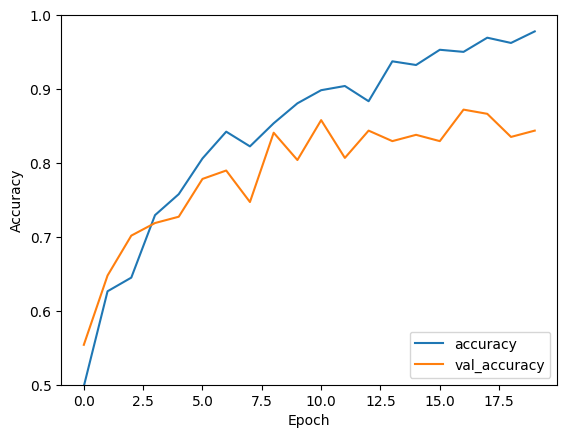

In [96]:
# Create plots for training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [97]:
# Evaluate the model on the test dataset (val_dataset in this case)
test_loss, test_acc = model.evaluate(val_dataset)
print(f"Test Accuracy: {test_acc}")

11/11 [==============================] - 1s 85ms/step - loss: 0.4582 - accuracy: 0.8438
Test Accuracy: 0.84375


# Experiment 5 (Chat GPTed)

Found 1408 images belonging to 2 classes.
Found 352 images belonging to 2 classes.
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 128)       73856     
                                    

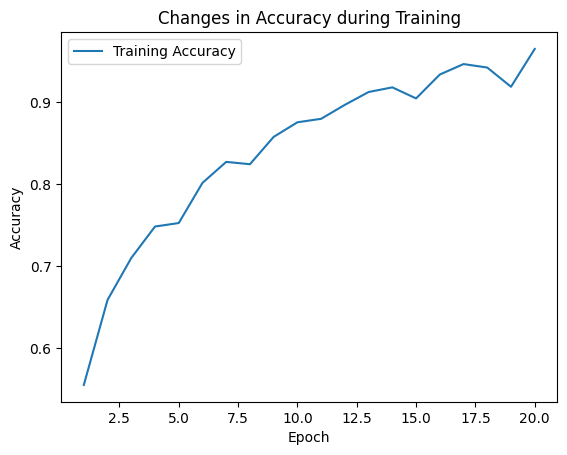

Average Training Accuracy: 0.8416903436183929
11/11 [==============================] - 1s 81ms/step - loss: 0.5426 - accuracy: 0.8409
Test Accuracy: 0.8409090638160706


In [68]:
# applying CNN on this dataset: got each patient's scalp map at every 10th millisecond from 0ms - 400ms on their ERP waveform. 
# This gave us 40 images per patient which is a total of 1,760 images
# I will be training this model from scratch meaning initializing random weights and making sure the model has no prior knoweldge on any other dataset.
#  using pretrained model might make my accuracy worse since the images are completely different

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Define relevant variables for the ML task
batch_size = 32
num_classes = 2
learning_rate = 0.001
num_epochs = 20

# Device will determine whether to run the training on GPU or CPU.
device = tf.device('gpu' if tf.test.is_gpu_available() else 'cpu')

# Define the path to your dataset
data_dir = 'C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\10ms interval dataset'

# Define the transformations
all_transforms = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2  # Splitting the dataset into training and validation sets
)

# Load the full dataset using flow_from_directory
train_dataset = all_transforms.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',  # Assuming a binary classification task (2 classes)
    subset='training'
)

val_dataset = all_transforms.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',  # Assuming a binary classification task (2 classes)
    subset='validation'
)


# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model and store the training history
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=num_epochs
)

# Access the training accuracy for each epoch
train_accuracy = history.history['accuracy']

# Print the epochs and accuracy
for epoch, accuracy in enumerate(train_accuracy, 1):
    print(f"Epoch {epoch}: Training Accuracy = {accuracy}")

    # Create a graph of the changes in accuracy during training
plt.plot(range(1, num_epochs + 1), train_accuracy, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Changes in Accuracy during Training')
plt.legend()
plt.show()

# Calculate the average training accuracy
average_accuracy = sum(train_accuracy) / len(train_accuracy)
print(f"Average Training Accuracy: {average_accuracy}")

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(val_dataset)
print(f"Test Accuracy: {test_accuracy}")

# Experiment 4

In [ ]:
# update: i never got to finish this 
# I'm going to try to stack the images, around 15 images to train the model
# the suggestion is to stack multiple images side by side, resulting in a 15-channel input tensor with dimensions n x n x 15. 
# This means that instead of feeding a single image into the CNN model, I would feed a combination of five++ images stacked together.

# By stacking multiple images, I increase the input depth and potentially capture more contextual information for the model to learn from. 

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50

# Modify the class names according to your dataset's classes
class_names = ["Hearing Impaired", "Healthy"]
 
data_dir = pathlib.Path("path_to_your_data_directory")

# Define the number of images to stack
num_channels = 5

# Set the image dimensions
img_height, img_width = 224, 224

# Create an empty list to store the stacked image data
stacked_images = []

# Iterate over the images in the data directory
for image_path in data_dir.glob("*.jpg"):
    # Load the image
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    
    # Append the image array to the stacked images list
    stacked_images.append(image_array)

# Convert the stacked images list to a numpy array
stacked_images = np.array(stacked_images)

# Reshape the stacked images array to include the number of channels
stacked_images = stacked_images.reshape(-1, img_height, img_width, num_channels)

# Normalize the pixel values (optional)
stacked_images = stacked_images / 255.0

# Create labels for the stacked images (adjust as per your dataset)
labels = np.array([0, 1, 0, 1, 1])  # Example labels

# Split the data into training and validation sets
train_ds = tf.data.Dataset.from_tensor_slices((stacked_images, labels)).batch(batch_size).shuffle(buffer_size)
val_ds = tf.data.Dataset.from_tensor_slices((stacked_images, labels)).batch(batch_size)

# Proceed with the model training using the modified data

# Modify the data loading and preprocessing
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

# ... Load and preprocess the validation dataset similarly

# Stack multiple images together for training dataset
train_ds_stacked = train_ds.map(lambda x, y: (tf.stack(x, axis=-1), y))

# ... Stack validation dataset similarly

# Modify the model architecture
resnet_model = Sequential()
pretrained_model = ResNet50(
    include_top=False,
    input_shape=(img_height, img_width, num_channels),
    pooling='avg',
    classes=len(class_names),
    weights='imagenet'
)

# ... Rest of the model architecture remains the same

# Compile and train the model
resnet_model.compile(optimizer=Adam(lr=1), loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 10
history = resnet_model.fit(
  train_ds_stacked,
  validation_data=val_ds_stacked,
  epochs=epochs
)

# ... Plot the accuracy graph


# Experiment 3b: Resnet 50 on N1

In [112]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data
import pathlib

# Update the dataset directory
data_dir = pathlib.Path("C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\all datasets\\N1")

img_height, img_width = 224, 224
batch_size = 32

# Load the full dataset using flow_from_directory
all_transforms = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2  # Splitting the dataset into training and validation sets
)

train_ds = all_transforms.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # Use subset='training' for the training dataset
)

val_ds = all_transforms.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # Use subset='validation' for the validation dataset
)

# Retrieve class names from the class indices
class_names = list(train_ds.class_indices.keys())

# Training The Model
resnet_model = Sequential()

# Create a new instance of ResNet50 without loading pre-trained weights
base_model = ResNet50(include_top=False, input_shape=(img_height, img_width, 3), pooling='avg')

# Add your custom layers on top of the base model
resnet_model.add(base_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))  # Updated output layer

resnet_model.summary()

# Compile the model
resnet_model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model from scratch
epochs = 20
history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


# Evaluate the model on the test dataset
test_loss, test_accuracy = resnet_model.evaluate(val_ds)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)


Found 36 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_14 (Flatten)        (None, 2048)              0         
                                                                 
 dense_30 (Dense)            (None, 512)               1049088   
                                                                 
 dense_31 (Dense)            (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 24,584,193
Non-trainable params: 53,120
_________________________________________________________________


c:\Users\student\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/20
2/2 [==============================] - 12s 2s/step - loss: 1.2720 - accuracy: 0.4444 - val_loss: 2.4055 - val_accuracy: 0.5000
Epoch 2/20
2/2 [==============================] - 1s 195ms/step - loss: 0.8203 - accuracy: 0.6667 - val_loss: 0.8545 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 1s 178ms/step - loss: 0.8363 - accuracy: 0.7778 - val_loss: 2.4318 - val_accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 1s 169ms/step - loss: 0.3949 - accuracy: 0.8056 - val_loss: 2.9105 - val_accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 1s 175ms/step - loss: 0.3608 - accuracy: 0.8056 - val_loss: 15.1045 - val_accuracy: 0.5000
Epoch 6/20
2/2 [==============================] - 1s 182ms/step - loss: 0.7061 - accuracy: 0.6944 - val_loss: 0.9897 - val_accuracy: 0.5000
Epoch 7/20
2/2 [==============================] - 1s 216ms/step - loss: 0.4730 - accuracy: 0.8333 - val_loss: 5.5155 - val_accuracy: 0.5000
Epoch 8/20
2/2 [=====

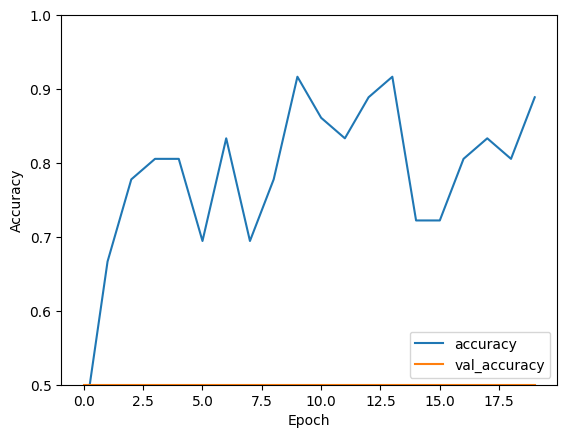

11/11 [==============================] - 1s 90ms/step - loss: 0.4582 - accuracy: 0.8438
Test Accuracy: 0.84375


In [115]:
# Create plots for training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test dataset (val_dataset in this case)
test_loss, test_acc = model.evaluate(val_dataset)
print(f"Test Accuracy: {test_acc}")

# Experiment 3a

Found 44 files belonging to 2 classes.
Using 36 files for training.
Found 44 files belonging to 2 classes.
Using 8 files for validation.
['Hearing Impaired', 'Not Hearing Impaired']


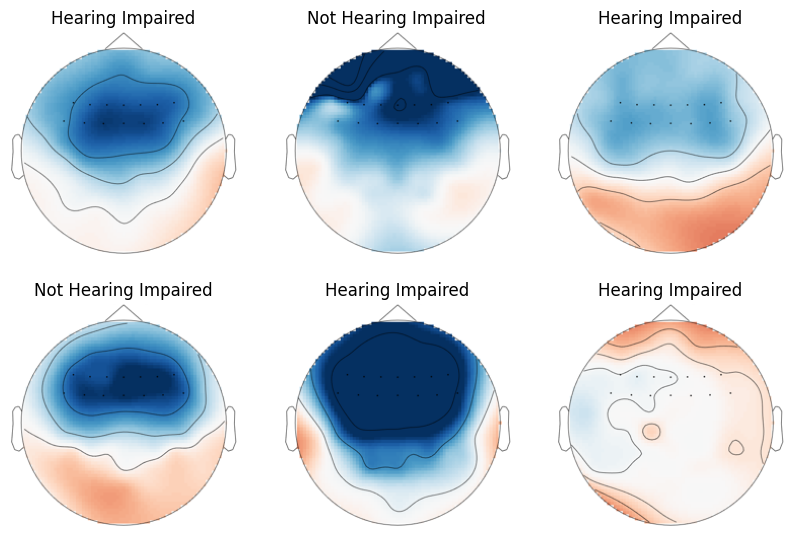

In [100]:
# resnet50 model on a subclass, so just one component/time which is only 44 images

import matplotlib.pyplot as plt
import numpy as np
# import osM
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data
import pathlib

# Update the dataset directory
data_dir = pathlib.Path("C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\all datasets\\N1")
# print(data_dir)

# Replace the existing logic for loading and preprocessing images with your own
# ...

# Modify the class names according to your dataset's classes
class_names = ["Hearing Impaired", "Healthy"]

img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



In [109]:
# Training The Model

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                  #  weights='imagenet')
)
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))  # Updated output layer
resnet_model.summary()
# resnet_model.compile(optimizer=Adam(lr=1),loss='categorical_crossentropy',metrics=['accuracy'])
resnet_model.compile(optimizers=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_12 (Flatten)        (None, 2048)              0         
                                                                 
 dense_26 (Dense)            (None, 512)               1049088   
                                                                 
 dense_27 (Dense)            (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________________________________________


TypeError: Invalid keyword argument(s) in `compile()`: ({'optimizers'},). Valid keyword arguments include "cloning", "experimental_run_tf_function", "distribute", "target_tensors", or "sample_weight_mode".

# Evaluating The Model

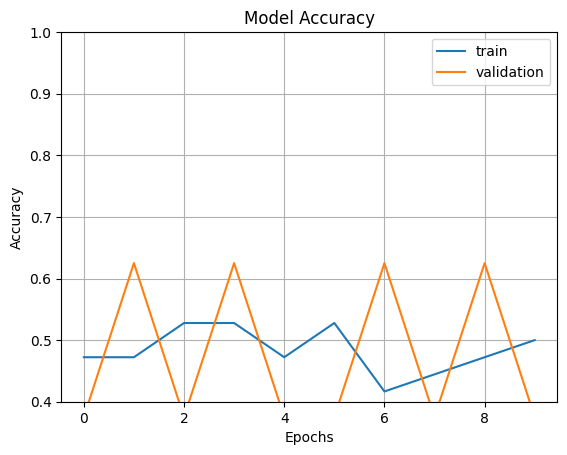

In [61]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

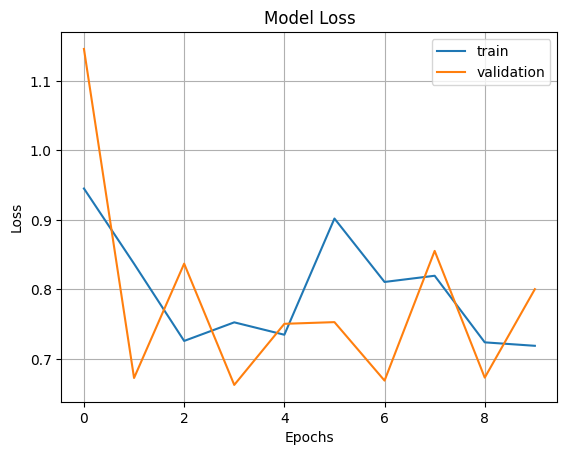

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Experiment 2

In [60]:
# adjusting learning rate, epoches and such for # resnet50 model on a subclass, so just one component/time which is only 44 images


import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data
import pathlib

# Update the dataset directory
data_dir = pathlib.Path("C:/Users/student/Documents/snhl-ERP/machine learning/N1")

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 8

# Data Augmentation
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomRotation(0.2),
        layers.experimental.preprocessing.RandomZoom(0.2),
        layers.experimental.preprocessing.Rescaling(1.0 / 255),
    ]
)

# Load and preprocess the training and validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="binary",
    shuffle=True,
    interpolation="bilinear",
    follow_links=False,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode="binary",
    shuffle=True,
    interpolation="bilinear",
    follow_links=False,
)

# Configure dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Define the base model (ResNet50) with pre-trained weights
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(img_height, img_width, 3),
    pooling="avg",
)

# Freeze the layers of the base model
base_model.trainable = False

# Build the model
model = Sequential([
    data_augmentation,
    base_model,
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Found 44 files belonging to 2 classes.
Using 36 files for training.
Found 44 files belonging to 2 classes.
Using 8 files for validation.
Epoch 1/10
5/5 [==============================] - 12s 556ms/step - loss: 0.9451 - accuracy: 0.4722 - val_loss: 1.1461 - val_accuracy: 0.3750
Epoch 2/10
5/5 [==============================] - 1s 119ms/step - loss: 0.8369 - accuracy: 0.4722 - val_loss: 0.6724 - val_accuracy: 0.6250
Epoch 3/10
5/5 [==============================] - 1s 110ms/step - loss: 0.7257 - accuracy: 0.5278 - val_loss: 0.8370 - val_accuracy: 0.3750
Epoch 4/10
5/5 [==============================] - 1s 113ms/step - loss: 0.7525 - accuracy: 0.5278 - val_loss: 0.6624 - val_accuracy: 0.6250
Epoch 5/10
5/5 [==============================] - 1s 108ms/step - loss: 0.7346 - accuracy: 0.4722 - val_loss: 0.7504 - val_accuracy: 0.3750
Epoch 6/10
5/5 [==============================] - 1s 107ms/step - loss: 0.9019 - accuracy: 0.5278 - val_loss: 0.7528 - val_accuracy: 0.3750
Epoch 7/10
5/5 [======

# Experiment 1

Found 212 files belonging to 2 classes.
Using 170 files for training.
Found 212 files belonging to 2 classes.
Using 42 files for validation.
['Healthy', 'Hearimg Impaired']


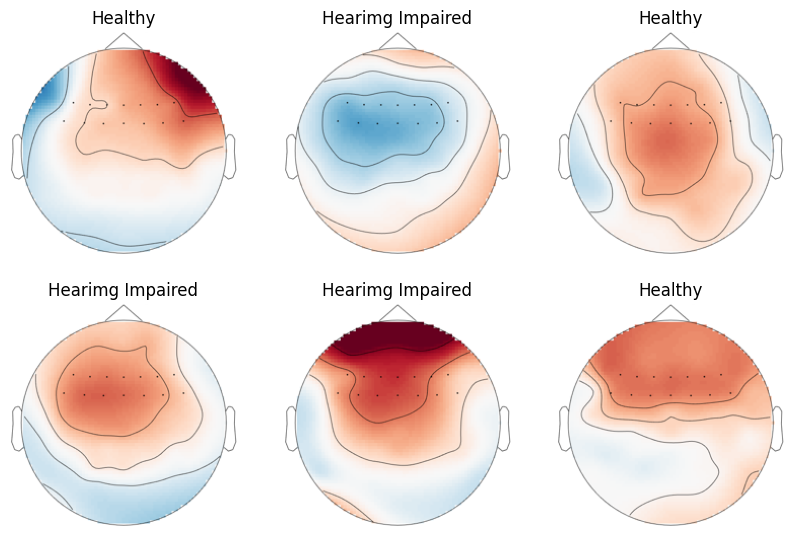

In [51]:
# resnet50 model on 2 classes where each patient has 5 images that come from different time points. accuracy is not the best

import matplotlib.pyplot as plt
import numpy as np
# import osM
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data
import pathlib

# Update the dataset directory
data_dir = pathlib.Path("C:\\Users\\student\\Documents\\snhl-ERP\\machine learning\\generalized-dataset")
# print(data_dir)

# Replace the existing logic for loading and preprocessing images with your own
# ...

# Modify the class names according to your dataset's classes
class_names = ["Hearing Impaired", "Healthy"]

img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
  
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



In [54]:
# Training The Model

resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))  # Updated output layer
resnet_model.summary()
resnet_model.compile(optimizer=Adam(lr=1),loss='categorical_crossentropy',metrics=['accuracy'])
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper_30 (ModuleWr  (None, 2048)             0         
 apper)                                                          
                                                                 
 module_wrapper_31 (ModuleWr  (None, 512)              1049088   
 apper)                                                          
                                                                 
 module_wrapper_32 (ModuleWr  (None, 1)                513       
 apper)                                                          
                                                                 
Total params: 24,637,313
Trainable params: 1,049,601
Non-trainable params: 23,587,712
_________________________________

# Reference code

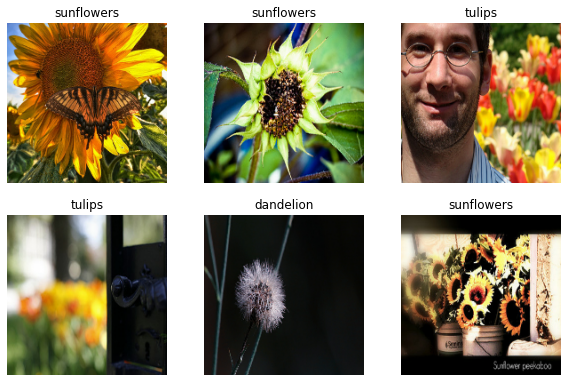

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model


In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 418s 5s/step - loss: 0.7422 - accuracy: 0.7715 - val_loss: 0.4269 - val_accuracy: 0.8488
Epoch 2/10
92/92 [==============================] - 396s 4s/step - loss: 0.2997 - accuracy: 0.8879 - val_loss: 0.3935 - val_accuracy: 0.8488
Epoch 3/10
92/92 [==============================] - 387s 4s/step - loss: 0.1788 - accuracy: 0.9380 - val_loss: 0.3644 - val_accuracy: 0.8638
Epoch 4/10
92/92 [==============================] - 391s 4s/step - loss: 0.1041 - accuracy: 0.9659 - val_loss: 0.4643 - val_accuracy: 0.8392
Epoch 5/10
92/92 [==============================] - 386s 4s/step - loss: 0.0598 - accuracy: 0.9843 - val_loss: 0.3616 - val_accuracy: 0.8774
Epoch 6/10
92/92 [==============================] - 387s 4s/step - loss: 0.0279 - accuracy: 0.9976 - val_loss: 0.3967 - val_accuracy: 0.8787
Epoch 7/10
92/92 [==============================] - 386s 4s/step - loss: 0.0143 - accuracy: 0.9993 - val_loss: 0.4017 - val_accuracy: 0.8937
Epoch 8/10
92

# Evaluating The Model

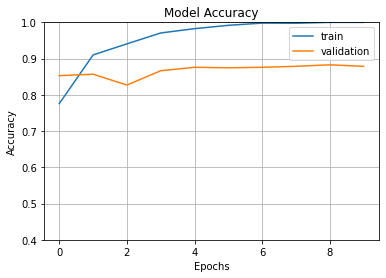

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

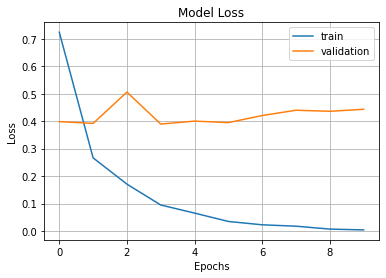

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

In [ ]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


In [ ]:
pred=resnet_model.predict(image)
print(pred)

[[8.2068445e-06 1.5209365e-06 9.9347222e-01 9.5006551e-05 6.4231041e-03]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is roses
